# Домашняя работа №3

In [2]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

In [ ]:
#your answer here
# Генеральная совокупность- это весь существующий набор значенией для наших показателей
# Выборка - случайно выбранная часть, содержащаяся в генеральной совокупности. Т.е. выборка меньше ген. совокупности.

- Если размер выборки больше 200, то такая выборка является репрезентативной?

In [ ]:
#your answer here
#ответ зависит от размера ген. совокупности и необходимой точности. На мой взгляд, такой размер выборки можно 
#считать репрезентативной

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

In [ ]:
#your answer here
#1) Длина волос всех футболистов Франции
#2) Длина волос всех футболистов мира
#3) Длина волос всех участников ЧМ-2018

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

In [ ]:
#your answer here
#1) вес детей, родившихся в Волгограде в 2018 году (т.е. за последний год)
# 2) взять всех детей, родившихся в Волгограде за последние 10 лет, при этом они родились 1 числа месяца

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


Text(0.5,0,'$x$')

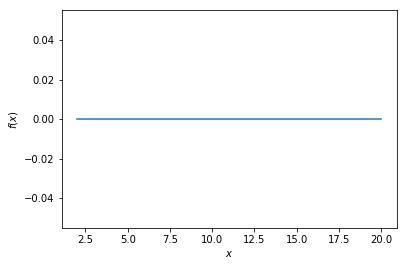

In [2]:
#your code here
#это равномерное распределение
uniform_rv = st.uniform(loc=-1, scale=2)
sample=uniform_rv.rvs(100)
x = np.linspace(2,20,21)
pdf = uniform_rv.pdf(x) 
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [15]:
#чувствительнее мат. ожидание

In [ ]:
sample=gamma_rv.rvs(100)
x = np.linspace(2,20,21)
cdf = gamma_rv.cdf(x) 
plt.plot(x, cdf)

In [9]:
gamma_rv = st.gamma(3, 1)
sample = gamma_rv.rvs(51)

med = sorted(sample)[24]
mean = sample.mean()
print("sample=", sample)
print("med=", med)
print("mean=", mean)

#your code here

sample_with_overshoot=sample
sample_with_overshoot[0] = sample_with_overshoot[0]*100
new_med =sorted(sample_with_overshoot)[24]
new_mean = sample_with_overshoot.mean()
print("sample_with_overshoot =", sample_with_overshoot)
print("new_med =", new_med)
print("new_mean =", new_mean)


sample= [2.90039684 2.01502489 5.90704907 2.74026543 4.69433091 1.94091578
 2.59923085 3.76307047 3.98372834 6.4118782  7.19908807 2.08059297
 2.95336539 8.80180589 4.158189   4.8894874  6.52098436 5.84681436
 2.31620324 2.48701969 5.71005727 2.82558369 5.52057315 2.64138348
 5.38048678 4.60060083 2.44599284 2.86694422 3.55955916 4.58250771
 3.0984161  1.30507604 6.43780228 3.83186532 3.88776387 3.38162493
 7.98988531 2.31580671 2.49069796 3.21100112 1.51406088 3.64159387
 5.77049329 3.2870258  5.18686392 4.04869627 5.83083254 3.19500345
 3.32598629 2.20526309 3.3608019 ]
med= 3.3816249349613168
mean= 3.9933272782829135
sample_with_overshoot = [290.03968399   2.01502489   5.90704907   2.74026543   4.69433091
   1.94091578   2.59923085   3.76307047   3.98372834   6.4118782
   7.19908807   2.08059297   2.95336539   8.80180589   4.158189
   4.8894874    6.52098436   5.84681436   2.31620324   2.48701969
   5.71005727   2.82558369   5.52057315   2.64138348   5.38048678
   4.60060083   2.445

- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [10]:
pois_rv = st.poisson(2)
n=100
sample = pois_rv.rvs(n)
C = 0.5
#your code here
mean = sample.mean()
sample_with_c=np.array([sample[i]+C for i in range(n)])
mean_with_c = sample_with_c.mean()
sample_mult_c =np.array([sample[i]*C for i in range(n)])
mean_mult_c =sample_mult_c.mean() 
print("sample=", sample)
print("mean=", mean)
print("sample_with_c=", sample_with_c)
print("mean_with_c=", mean_with_c)
print("sample_mult_c=", sample_mult_c)
print("mean_mult_c=", mean_mult_c)
#т.е. мат ожидание увеличится на С. Увеличится в С раз

sample= [2 2 4 2 1 2 2 2 0 1 2 1 2 0 1 1 1 4 2 2 3 3 3 2 0 1 1 3 1 0 0 2 2 3 2 1 2
 1 0 1 1 1 1 2 0 2 0 1 1 0 1 2 3 2 4 1 1 0 0 2 5 0 1 1 1 0 1 3 1 3 1 2 3 2
 1 0 2 2 5 1 2 2 6 2 2 4 1 2 5 2 3 3 2 3 3 6 3 1 2 2]
mean= 1.81
sample_with_c= [2.5 2.5 4.5 2.5 1.5 2.5 2.5 2.5 0.5 1.5 2.5 1.5 2.5 0.5 1.5 1.5 1.5 4.5
 2.5 2.5 3.5 3.5 3.5 2.5 0.5 1.5 1.5 3.5 1.5 0.5 0.5 2.5 2.5 3.5 2.5 1.5
 2.5 1.5 0.5 1.5 1.5 1.5 1.5 2.5 0.5 2.5 0.5 1.5 1.5 0.5 1.5 2.5 3.5 2.5
 4.5 1.5 1.5 0.5 0.5 2.5 5.5 0.5 1.5 1.5 1.5 0.5 1.5 3.5 1.5 3.5 1.5 2.5
 3.5 2.5 1.5 0.5 2.5 2.5 5.5 1.5 2.5 2.5 6.5 2.5 2.5 4.5 1.5 2.5 5.5 2.5
 3.5 3.5 2.5 3.5 3.5 6.5 3.5 1.5 2.5 2.5]
mean_with_c= 2.31
sample_mult_c= [1.  1.  2.  1.  0.5 1.  1.  1.  0.  0.5 1.  0.5 1.  0.  0.5 0.5 0.5 2.
 1.  1.  1.5 1.5 1.5 1.  0.  0.5 0.5 1.5 0.5 0.  0.  1.  1.  1.5 1.  0.5
 1.  0.5 0.  0.5 0.5 0.5 0.5 1.  0.  1.  0.  0.5 0.5 0.  0.5 1.  1.5 1.
 2.  0.5 0.5 0.  0.  1.  2.5 0.  0.5 0.5 0.5 0.  0.5 1.5 0.5 1.5 0.5 1.
 1.5 1.  0.5 0.  1.  1.  2.5 0.5 

- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [12]:
#дисперсия увеличится
exp_rv = st.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()
print("sample=",sample)
print("var=", var)
#your code here
sample_with_overshoot=sample
sample_with_overshoot[0] = sample_with_overshoot[0]*100
new_var =sample_with_overshoot.var()

print("sample_with_overshoot=",sample_with_overshoot)
print("new_var=",new_var)


sample= [4.66013942 4.58678372 4.66085082 4.38102675 4.48827834 4.50681722
 4.40376376 4.31968103 7.22992749 5.6871124  5.38930762 5.63743376
 4.80231349 6.10012733 4.46075273 5.18583826 4.16274433 4.70334721
 5.06553169 4.18294739 4.39967249 5.36292776 4.05093585 4.8486591
 8.05992937 8.51798256 4.22445582 6.58224617 5.74755826 6.96775302
 5.19839808 5.78502243 4.73791376 5.27252833 4.80544633 4.0644381
 5.03337773 4.25445265 4.85720617 5.44954527 6.08352931 4.80388024
 6.02029566 4.02951138 7.20012224 4.66241754 4.60334432 5.19208753
 4.59148968 6.49190185]
var= 1.0570806271104216
sample_with_overshoot= [466.01394152   4.58678372   4.66085082   4.38102675   4.48827834
   4.50681722   4.40376376   4.31968103   7.22992749   5.6871124
   5.38930762   5.63743376   4.80231349   6.10012733   4.46075273
   5.18583826   4.16274433   4.70334721   5.06553169   4.18294739
   4.39967249   5.36292776   4.05093585   4.8486591    8.05992937
   8.51798256   4.22445582   6.58224617   5.74755826   6.9

In [13]:
exp_rv = st.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
sample_with_overshoot=sample
sample_with_overshoot[0] = sample_with_overshoot[0]*100
new_var =sample_with_overshoot.var()
print("sample=",sample)
print("var=", var)
print("sample_with_overshoot=",sample_with_overshoot)
print("new_var=",new_var)

sample= [524.63952527   4.55374436   5.63154395   4.27149924   5.29101212
   4.8934493    4.67672138   4.39167025   4.82459123   4.40875057
   5.18671862   5.91143723   4.0936616    4.21841833   4.22199175
   4.63841974   5.19351237   4.51752145   5.12140522   4.13931953
   4.17238476   4.08874602   4.88517614   4.22374989   5.06943355
   4.22478283   5.61600789   4.35736556   4.14954157   4.83059549
   4.18490764   4.58665149   5.79716965   4.39136362   4.58128488
   4.94085353   4.16248586   6.37973596   6.53383978   4.13511812
   8.21487327   4.21579547   4.50449436   4.12360124   4.63185801
   4.80183894   4.04432335   5.65273277   4.10560281   7.24815527]
var= 0.7269873995216914
sample_with_overshoot= [524.63952527   4.55374436   5.63154395   4.27149924   5.29101212
   4.8934493    4.67672138   4.39167025   4.82459123   4.40875057
   5.18671862   5.91143723   4.0936616    4.21841833   4.22199175
   4.63841974   5.19351237   4.51752145   5.12140522   4.13931953
   4.17238476   4.08

- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [22]:

norm_rv = st.norm(3,2)
n=100
sample = norm_rv.rvs(n)
#your code here
print("sample=",sample)

ppf_25=sorted(sample)[24]
ppf_75=sorted(sample)[74]

int_1=(ppf_75-ppf_25)*math.sqrt(sample.var())
#m=sum([sample[i] for i in range(n)])/n
int_2= math.sqrt(sample.var())*2

print("int_1=",int_1)
print("int_2=",int_2)

#первый интервал шире


sample= [-1.05747738  0.1611744   4.00310627  2.40953818 -0.04426596  3.4757769
  6.64818186  0.97089491  6.12848513  4.52764366  2.35318175  4.18672485
  1.69902382  0.3112351   2.76602024  4.47342583  3.46181432  2.20866506
  2.57607979  0.20175018  4.136343    4.79283885  1.64172259  0.19969442
  5.23828305  0.78348502  3.05571432  5.20324523  5.26145038  0.86328691
  1.00023347  6.00611666  2.56153747  0.5625677   5.46516376  5.93885836
  4.02132426 -0.40337331  3.57093059  3.86743257  2.73139977  0.851393
  2.73635222  3.45564605  1.97982579  0.12373202  4.7757116   2.776054
  3.457758    3.04361869  4.75481714  3.16847076  4.7067834  -3.57361136
  1.91288229  1.84544968  4.39674449  3.11281294 -1.03288952  3.45424309
 -1.60807836 -2.19646385  3.03913913  5.33531564  4.76746884  4.88373433
  7.11832982  3.20356924  2.24381136  2.70118393  2.84269124  2.50859218
  5.18896124  2.93978779  2.6930226   2.28204526  3.1330551   5.32656904
  3.86180042  5.03057226  4.73398292  0.54806252

## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [13]:
#Статистика представляет собой количественную характеристику исследуемых параметров,
#характеризующих распределение случайной величины, полученную на основе исследования выборочных значений. 
#Статистика используется либо для описания самой выборки, либо, что имеет первостепенное значение в 
#фундаментальных экспериментальных исследованиях, 
#для оценки параметров распределения случайной величины в исследуемой генеральной совокупности
beta_rv = st.beta(1,3)
n=100
sample = beta_rv.rvs(n)
#your code here
#посчитаем мат. ожидание
mean = sample.mean()
print(sample)
print(mean)

[0.43572704 0.31832449 0.28897837 0.33196191 0.01015813 0.17490844
 0.27485439 0.59317646 0.21428496 0.44515897 0.7187098  0.03761079
 0.01977113 0.20276427 0.68862993 0.14478467 0.01732958 0.03784642
 0.2767209  0.26159497 0.00524757 0.04208808 0.05736468 0.0595886
 0.06147118 0.14194907 0.30798924 0.32889642 0.19337138 0.29188029
 0.03581338 0.08380222 0.34591401 0.46648195 0.35635406 0.0246156
 0.46511042 0.20371264 0.20623574 0.01094847 0.09737057 0.3697388
 0.07999723 0.29400878 0.29283952 0.15395628 0.00523811 0.20886173
 0.30828793 0.34710538 0.03317946 0.46109139 0.05857528 0.04610316
 0.18055563 0.15962567 0.47647871 0.50521845 0.046194   0.0729152
 0.30950761 0.20233383 0.1455623  0.21108627 0.22063579 0.09314633
 0.06601761 0.04480633 0.45861788 0.17747799 0.02894396 0.65254239
 0.09860648 0.11040065 0.0411486  0.37812424 0.32822938 0.0309801
 0.14253868 0.6559186  0.19269216 0.28472395 0.15930608 0.05619936
 0.382301   0.07380333 0.14445463 0.55280585 0.61900777 0.30880829


- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [12]:
gamma_rv = st.gamma(2,2)
n=100
sample = gamma_rv.rvs(n)
#your code here
mean =sample.mean()
var =sample.var()
med =(sorted(sample)[49]+sorted(sample)[50])/2
print(sorted(sample))
print(mean)
print(var)
print(med)


[2.132217279405145, 2.1670575085161663, 2.299636784009343, 2.3082138832293015, 2.3126595236492107, 2.334426986332705, 2.334641237730113, 2.415196798661468, 2.4290801362010384, 2.565088278420786, 2.630447724829327, 2.692072427145419, 2.7206637455592197, 2.7359873752965704, 2.746699749723226, 2.75396496128692, 2.7626983396718012, 2.8451801387073514, 2.8538623067134505, 2.8598867085795687, 2.8791489510082986, 2.9203757206411733, 2.9403032925812598, 2.947354493422629, 2.9954996475622506, 3.1014196678426034, 3.1467926471809973, 3.202754097408709, 3.295614377852602, 3.3132234596227295, 3.364627505413802, 3.3711397134103924, 3.3948884514844417, 3.395615138027268, 3.4042970896953593, 3.4157662917741742, 3.4235101610029224, 3.4248116043206625, 3.4547866255436253, 3.4628181546523615, 3.4854214998358906, 3.5519394088344027, 3.580264284408317, 3.6067785155361225, 3.6486945947846277, 3.6700881594461103, 3.6917662484392264, 3.7029153224744995, 3.7151310846837893, 3.750485289081775, 3.773087469627258

2.132217279405145

- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

In [15]:
#имеет нормальное распределение
#your code here
norm_rv = st.norm(5,2)
n=10000
#mean_array=[]
mean_array = np.array(np.zeros(n))
for i in range(n):
    sample = norm_rv.rvs(50)
    #your code here
    mean_array[i] =sample.mean()
#print(mean_array)
mean_array_mean=mean_array.mean()
mean_array_var=mean_array.var()
print(mean_array_mean)
print(mean_array_var)
var_theory=2**2/50
print(var_theory)

4.99765931849247
0.07954798921606435
0.08


- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

In [16]:
#берем выборки меньше 30, например, из 10 элементов
norm_rv = st.norm(5,2)
n=10000
#mean_array=[]
mean_array = np.array(np.zeros(n))
for i in range(n):
    sample = norm_rv.rvs(10)
    #your code here
    mean_array[i] =sample.mean()
#print(mean_array)
mean_array_mean=mean_array.mean()
mean_array_var=mean_array.var()
print(mean_array_mean)
print(mean_array_var)
var_theory=2**2/50
print(var_theory)




4.9893224252355255
0.40220114387267725
0.08


- Сделайте z-преобразование для данного распределения и посчитайте новое матожидание и дисперсию 

In [17]:
expon_rv = st.expon(3)
sample=expon_rv.rvs(100)
mean=sample.mean()
var=sample.var()
sigma=math.sqrt(var)
print(mean)
print(var)
for i in range(100):
    sample[i]=(sample[i]-mean)/sigma
#new_rv = #your code here
new_mean=sample.mean()
new_var=sample.var()
print(new_mean)
print(new_var)

3.910565532396137
0.5825960408676126
-3.558264793923627e-16
1.0


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [20]:
#your code here
chi2_rv = st.chi2(10)
sample=chi2_rv.rvs(100)
ppf_90=chi2_rv.ppf(0.9)
print(ppf_90)


15.987179172105263


- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [25]:
#your code here
t_rv = st.t(15)
sample=t_rv.rvs(100)
ppf_5=t_rv.ppf(0.05)
ppf_95=t_rv.ppf(0.95)
ppf_2_5=t_rv.ppf(0.025)
ppf_97_5=t_rv.ppf(0.975)
print(ppf_95-ppf_5)
print(ppf_97_5-ppf_2_5)
#второй шире

3.50610071138511
4.262899091118646


- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [40]:
norm_rv = st.norm(0, 2)
sample1=norm_rv.rvs(100)
sample2=norm_rv.rvs(200)

ppf95=norm_rv.ppf(0.95)
ppf5=norm_rv.ppf(0.05)
ppr90=ppf95-ppf5
print("int_1="ppf90*2)
print("int_2="ppf90*2)


# ДИ одинаковые

2.5631031310892007
2.5631031310892007
3.760595796896688
4.084222560461926


- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [ ]:
#your answer here
#ошибка второго рода. Приняли невернут нулевую гипотезу.

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем хуже гипотеза.


In [ ]:
#your answer here
#1-ое верно
#2-зависит от заданного уровня значимости
#3-неверное утверждение

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99% доверительный интервал хорошей оценкой в общем случае?

In [ ]:
#your answer here
#p=0.01
#нет, слишком широкий интервал. Попадают почти все значения

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

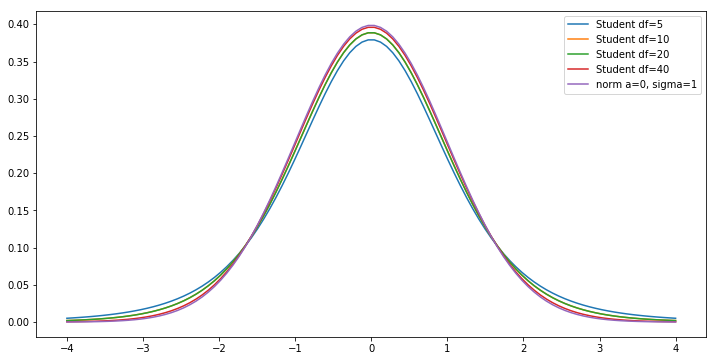

In [35]:
# чем больше степеней свободы, тем близе распределение Стьюдента к нормальному
import scipy.stats as sts
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

t_rv = sts.t(5)
norm_rv = sts.norm(0, 1)
t_rv_2 = sts.t(10)
t_rv_3=sts.t(20)
t_rv_4=sts.t(40)
x = np.linspace(-4, 4, 100)

plt.figure(figsize=(12,6))

pdf = t_rv.pdf(x)
plt.plot(x, pdf)

pdf_2 = t_rv_2.pdf(x)
plt.plot(x, pdf_2)

pdf_3 = t_rv_3.pdf(x)
plt.plot(x, pdf_2)

pdf_4 = t_rv_4.pdf(x)
plt.plot(x, pdf_4)

pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_norm)

plt.legend(['Student df=5', 'Student df=10', 'Student df=20','Student df=40','norm a=0, sigma=1'])




- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

r =  -1.0


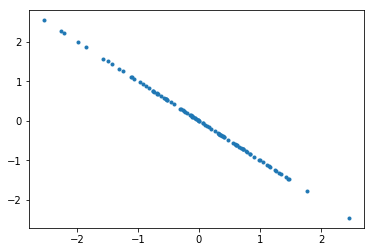

In [52]:
#your code here
#import matplotlib.pyplot as plt
#d = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
#     111, 132, 149, 122, 139, 119, 136, 129, 126, 128, 113, 185, 143, 140, 123, 126, 134]
#plt.plot(d, pdf)
#
#plt.ylabel('fraction of samples')
#plt.xlabel('$x$')





import scipy.stats as st
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

N = 100
norm_rv = st.norm(0, 1)
x=norm_rv.rvs(N)
y=np.array([(-1)*i for i in x])

avg_x = x.mean()
avg_y = y.mean()
r=sum([(x[i]-avg_x)*(y[i]-avg_y) for i in range(N)])/math.sqrt(sum([(x[i]-avg_x)**2 for i in range(N)])*sum([(y[i]-avg_y)**2 for i in range(N)]))

print("r = ", r)

plt.plot(x, y, '.')
plt.show()









- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

r =  -2.4160251652530546e-20


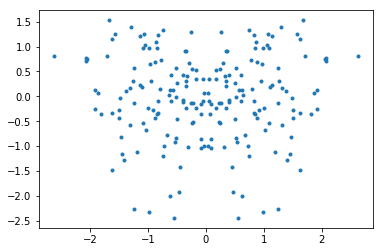

In [53]:
#your code here
import scipy.stats as st
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

N = 100
norm_rv = st.norm(0, 1)
sample1=norm_rv.rvs(N)
sample2=norm_rv.rvs(N)

#x=np.array([sample1[(i%100)]*(-1)**(i//100) for i in range(2*N)])
#y=np.array([sample2[(i%100)]                for i in range(2*N)])

x=np.array([sample1[(i%100)] for i in range(2*N)])
for i in range(100):
    x[i] = x[i] * (-1) 

y=np.array([sample2[(i%100)] for i in range(2*N)])



#y=np.array([(-1)**(i//100) for i in range(2*N)])

avg_x = x.mean()
avg_y = y.mean()
r=sum([(x[i]-avg_x)*(y[i]-avg_y) for i in range(2*N)])/math.sqrt(sum([(x[i]-avg_x)**2 for i in range(2*N)])*sum([(y[i]-avg_y)**2 for i in range(2*N)]))

print("r = ", r)

plt.plot(x, y, '.')
plt.show()

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [42]:
norm_rv = sts.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))

#your code here
#не могу понять, как делать:)

In [35]:
print(5//2)

2
